## ML 과제

과제할 때 꿀팁!

1. 이전 세션들에서의 자료를 찾아본다.
2. 질문방에 질문한다.
3. 구글링한다.
4. 복붙하지 않고 직접 타이핑해서 코드를 완성한다.

In [1]:
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings(action='ignore')

### 0. Titanic 데이터 로드 및 훓어보기

In [2]:
# 여러분이 이전 과제로 만드셨을 FE를 진행한 데이터 보다는 원본 데이터가 조금 더 이번 실습에 적합하기 때문에 원본을 사용하겠습니다.
# 데이터를 로드하고, 잘 불러와진 것인지 첫 5행을 불러와 확인해보세요.

titanic = pd.read_csv('titanic.csv')
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
# 변수들의 데이터 타입, 결측치, target의 imbalance 여부를 확인해주세요.
titanic.info()

titanic.groupby('Survived').size()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Survived
0    549
1    342
dtype: int64

In [4]:
# 편의상 결측치 데이터 및 승객 고유의 데이터('PassengerId','Name', 'Ticket', 'Cabin')는 모두 drop 시킵시다.
# 실제 프로젝트에서는 이렇게 하시면 성능이 낮을 수 있어요!!

titanic = titanic.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1)

In [5]:
# categorical feature(Sex, Embarked)에 대해 LabelEncoding을 진행해 주세요.
# 전처리 완료된 DataFrame을 첫 5행을 불러와 확인해보세요

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

titanic['Sex'] = le.fit_transform(titanic['Sex'])
titanic['Embarked'] = le.fit_transform(titanic['Embarked'].astype(str))
titanic.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,2
1,1,1,0,38.0,1,0,71.2833,0
2,1,3,0,26.0,0,0,7.9250,2
3,1,1,0,35.0,1,0,53.1000,2
4,0,3,1,35.0,0,0,8.0500,2


In [6]:
#결측값 확인
(titanic.isnull().sum()).sort_values(ascending=False)

Age         177
Embarked      0
Fare          0
Parch         0
SibSp         0
Sex           0
Pclass        0
Survived      0
dtype: int64

In [7]:
#Age column을 복사해 새로운 Age_filled column 생성
titanic['Age_filled'] = titanic['Age']

#Age column에서 결측값의 수만큼 샘플 추출
temp = (titanic['Age'].dropna().sample(titanic['Age'].isnull().sum()))

#sample을 추출한 tempp에 인덱스를 부여하여 Age_filled columnd에 추가
temp.index = titanic[lambda x: x.Age.isnull()].index
titanic.loc[titanic['Age'].isnull(), 'Age_filled'] = temp
titanic.head(6)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Age_filled
0,0,3,1,22.0,1,0,7.2500,2,22.0
1,1,1,0,38.0,1,0,71.2833,0,38.0
2,1,3,0,26.0,0,0,7.9250,2,26.0
3,1,1,0,35.0,1,0,53.1000,2,35.0
4,0,3,1,35.0,0,0,8.0500,2,35.0
5,0,3,1,NaN,0,0,8.4583,1,28.0


In [8]:
#결측값이 있는 기존으 Age Column 삭제
titanic = titanic.drop('Age', axis=1)
titanic.head(10)

,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked,Age_filled
0,0,3,1,1,0,7.2500,2,22.0
1,1,1,0,1,0,71.2833,0,38.0
2,1,3,0,0,0,7.9250,2,26.0
3,1,1,0,1,0,53.1000,2,35.0
4,0,3,1,0,0,8.0500,2,35.0
5,0,3,1,0,0,8.4583,1,28.0
6,0,1,1,0,0,51.8625,2,54.0
7,0,3,1,3,1,21.0750,2,2.0
8,1,3,0,0,2,11.1333,2,27.0
9,1,2,0,1,0,30.0708,0,14.0


### 1. Train-Test split & 종속변수-설명변수 분할

In [9]:
# 분할을 위해 필요한 적절한 패키지를 불러와주세요 
# train-test split 및 종속변수-설명변수 분할을 진행해주세요

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

y = titanic.Survived
X = titanic.drop('Survived', axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y , test_size = 0.2, random_state = 40)

### 2. Decision Tree를 통한 Classification

In [10]:
# Decision Tree에서 categorical feature인 'Pclass'를 기준으로 첫 번째 Node(Root Node)가 분리된다고 가정합시다.
# 이 때 Entropy 지표를 통해 Information Gain을 계산할 수 있는 함수(또는 코드)를 작성하고, Information gain을 계산하세요.
# 실습에서 다루지 않은 내용입니다. 코드가 어려우시다면 줄글로만 풀이과정을 작성해주셔도 됩니다.

# titanic data로 Pclass를 분리기준으로 이용했을 때의 entropy를 계산하는 상황만 고려하시면 됩니다.
# 계산에 사용할 데이터는 분할 이전의 0번에서 전처리 완료한 데이터를 기준으로 하겠습니다!
# 올바르게 계산할 시 Information Gain은 0.0097이 나옵니다.

def entropy(target_col):
    elements, counts = np.unique(target_col, return_counts = True)
    entropy = -np.sum([(counts[i]/np.sum(counts))*np.log2(counts[i]/np.sum(counts)) for i in range(len(elements))])
    return entropy

def InfoGain(data,split_name,target_name):
 
    # 전체 엔트로피 계산
    total_entropy = entropy(titanic[target_name])
    
    # 가중 엔트로피 계산
    vals,counts= np.unique(data[split_name],return_counts=True)
    Weighted_Entropy = np.sum([(counts[i]/np.sum(counts))*
                               entropy(data.where(data[split_name]==vals[i]).dropna()[target_name])                        
                               for i in range(len(vals))])
 
    Information_Gain = total_entropy - Weighted_Entropy
    return Information_Gain
 
print('InformationGain(Pclass) = ', round(InfoGain(titanic, "Pclass", "Survived"), 4))

InformationGain(Pclass) =  0.0838


##### <b>줄글 답안</b>
>Information gain = entropy(parent) - [weighted average] entropy(children)

Entropy: example들의 집합에서의 혼합성(impurity)을 나타냄 



Information Gain: 지정된 속성이 얼마나 잘 training example들간을 구분하는가에 대한 수치. 
분기 이전의 엔트로피에서 분기 이후의 엔트로피를 뺀 값.




In [11]:
# Decision Tree 모델을 사용하기 위한 적절한 패키지를 불러와 주세요
# 별 다른 parameter 설정 없이 객체를 만들어 주고, 학습을 진행하세요

titanic_clf = DecisionTreeClassifier()
titanic_clf.fit(X_train, y_train) 

DecisionTreeClassifier()

### 3. Graphviz를 통한 시각화

graphviz 설치를 하지 않으셨거나 오류가 난다면 이 부분은 건너뛰셔도 좋습니다

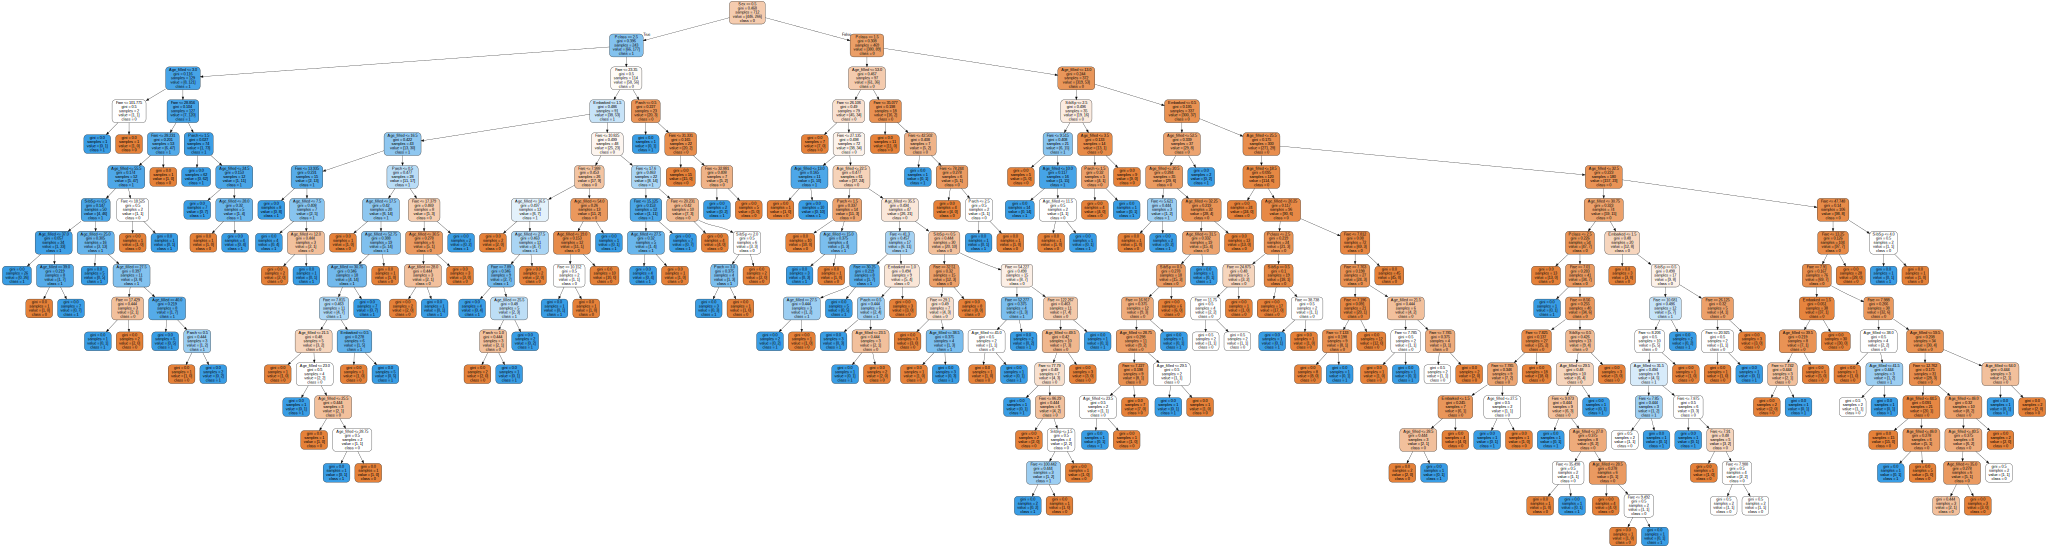

In [12]:
from sklearn.tree import export_graphviz

export_graphviz(titanic_clf,
                out_file=("titanic_hw.dot"),
                feature_names=X_train.columns,
                class_names=['0','1'],
                rounded=True,
                filled=True)

import graphviz
import os

os.environ["PATH"] += os.pathsep + 'C:/graphviz-2.38/release/bin'

with open("titanic_hw.dot") as f:
    dot_graph = f.read()
    display(graphviz.Source(dot_graph))

### 4. 결과 확인

In [13]:
# accuracy, f1 score, roc_auc score, confusion matrix, classification report를 모두 불러와주세요
# 불러온 metric(결과 확인 지표)들을 통해 결과를 확인해주세요.

#metric(결과확인지표)
proba = titanic_clf.predict_proba(X_test)
prediction = titanic_clf.predict(X_test)
print('※Prediction※', ' ', prediction, sep = '\n')


※Prediction※
 
[1 0 1 0 0 0 0 0 0 0 1 0 1 0 0 0 0 1 0 0 0 1 1 1 1 1 0 0 0 1 1 0 0 0 0 1 1
 0 0 1 0 0 1 1 1 0 0 1 0 0 1 0 1 1 1 0 0 1 1 0 1 0 0 1 1 0 1 1 0 1 1 1 0 0
 0 0 0 1 0 1 1 1 1 0 1 1 1 1 1 1 0 1 0 0 0 1 0 0 0 1 1 0 1 0 1 0 0 1 0 0 0
 0 0 1 1 0 1 1 0 1 0 0 1 1 1 1 0 0 0 1 0 1 0 0 0 0 1 0 0 1 0 0 1 0 1 1 0 0
 1 1 0 0 1 1 0 0 1 0 1 0 0 1 0 1 0 0 1 0 0 0 0 0 0 0 0 0 1 0 1]


In [14]:
# confusion matrix
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, confusion_matrix, classification_report

matrix = confusion_matrix(y_test, prediction)
matrix

array([[83, 20],
       [18, 58]], dtype=int64)

In [15]:
# accuracy, f1 score, roc_auc score
print('Accuracy:: {}'.format(accuracy_score(y_test, prediction)),
      'F1_Score:: {}'.format(f1_score(y_test, prediction)),
      'ROC_AUC_Score:: {}'.format(roc_auc_score(y_test, prediction)), sep = '\n')

Accuracy:: 0.7877094972067039
F1_Score:: 0.7532467532467534
ROC_AUC_Score:: 0.7844915687276444


In [16]:
#classification report
print( classification_report(y_test, prediction) )

              precision    recall  f1-score   support

           0       0.82      0.81      0.81       103
           1       0.74      0.76      0.75        76

    accuracy                           0.79       179
   macro avg       0.78      0.78      0.78       179
weighted avg       0.79      0.79      0.79       179



### 5. GridSearch를 통한 Tree pruning

In [17]:
# GridSearch를 위한 적절한 패키지를 불러와 주세요
# max_leaf_nodes를 제외한 3가지 이상의 parameter에 대한 GridSearch를 진행해주세요. scoring은 원하시는 지표로 하셔도 됩니다.

from sklearn.model_selection import GridSearchCV
grid_dt = DecisionTreeClassifier()

criterion = ['gini', 'entropy'] 
max_depth = [5, 6, 7]
max_features = [None]
min_impurity_split = [None]
min_impurity_decrease=[0.0, 1.0]

parameter_grid = {'criterion': criterion,
                    'max_depth': max_depth,
                    'max_features' : max_features,
                    'min_impurity_split': min_impurity_split,
                    'min_impurity_decrease' : min_impurity_decrease}

gs = GridSearchCV(estimator= grid_dt, param_grid= parameter_grid, scoring= 'f1')


gs.fit(X_train, y_train)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [5, 6, 7], 'max_features': [None],
                         'min_impurity_decrease': [0.0, 1.0],
                         'min_impurity_split': [None]},
             scoring='f1')

In [18]:
# 최적 parameter 조합 / Validation score / Test score를 확인해 주세요.

print('GridSearch 최적 parameter: {}'.format(gs.best_params_),
      'GridSearch 최고 Validation Score: {:.3f}'.format(gs.best_score_), sep = '\n')

GridSearch 최적 parameter: {'criterion': 'entropy', 'max_depth': 7, 'max_features': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None}
GridSearch 최고 Validation Score: 0.705


In [ ]:
## GridSearch에 사용하신 parameter는 Decision Tree 모델 학습에서 어떤 역할을 하는지 간단하게 요약해주세요.
## ex) criterion은 decision tree의 분류 기준인 불순도 지표를 정한다.
## hint) Shift+tab

criterion - decision tree의 분류 기준인 불순도 지표를 결정
max_depth - 노드의 최대 깊이수, 제한이 없는 경우 overfitting의 문제가 발생할 가능성 존재
max_features - 각 노드에서 분할에 사용할 변수의 최대 수
min_impurity_split - 분할로 얻어질 불순도의 감소량 지정
min_impurity_decrease - 분할 대상이 되기 위해 필요한 최소한의 불순도 지정

> ### <b>고생하셨습니다~</b>

생각보다 GridSearch의 결과가 안 좋게 나와서 이상하다 생각하신 분들도 있을 수 있습니다. GridSearch 특성상 기존에 정해준 parameter 범위 내에서 찾는 것이기 때문에 애초에 적절한 parameter 후보를 찾지 못했다면 성능이 안 좋을 수도 있습니다. 앞으로 여러 프로젝트 진행해보시면서, parameter 찾는 것에 대한 감도 스스로 익혀보시면 좋을 것 같습니다!